# ENSEMBLE TECHNIQUE

### 1. Importing the necessary libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# for making models
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score

from sklearn.tree import DecisionTreeClassifier

# for ensemble techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# for plotting the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
from os import system
from IPython.display import Image  
import pydotplus
import graphviz



C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### 2. Reading the data as a dataframe 'bank'

In [2]:
bank = pd.read_csv('bank-full.csv')
# printing first five observations
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3. Perform Basic EDA

#### a. Shape of the data

In [7]:
bank.shape

(45211, 17)

In [8]:
# There are 45211 observations of 17 columns in the dataset

#### b. Datatype of each attribute

In [9]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#### c. Checking the pressence of missing values

In [10]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
# No missing values found in the dataset 

#### d. Five point summary of numerical attributes

In [12]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [13]:
# Except age and day, all numeric attributes are highly skewed (mean is very large than median)

#### e. checking the pressence of outliers

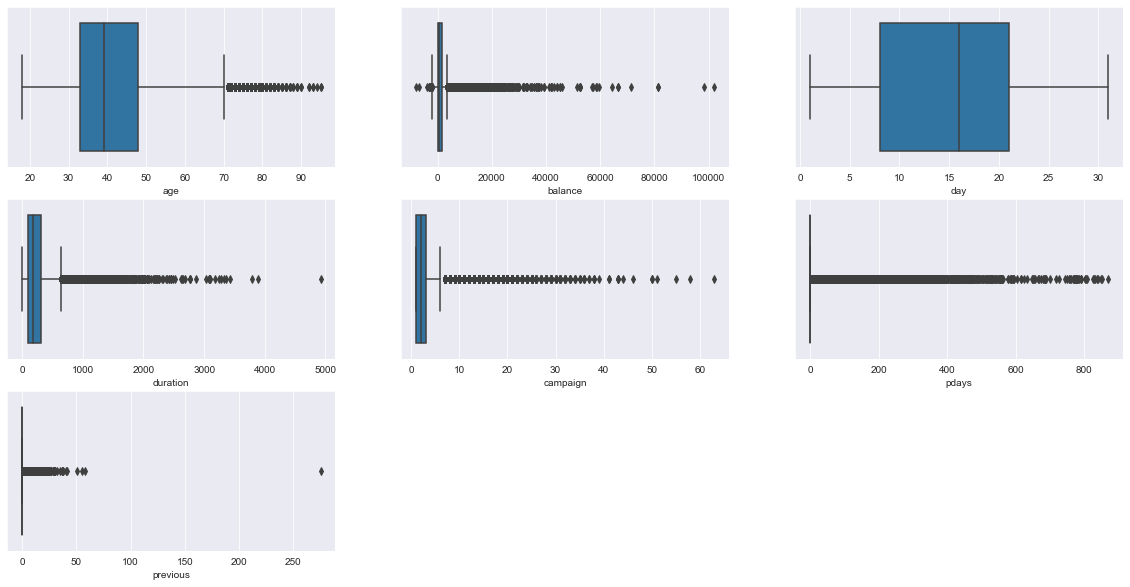

In [14]:
plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
sns.boxplot(bank.age)
plt.subplot(3,3,2)
sns.boxplot(bank.balance)
plt.subplot(3,3,3)
sns.boxplot(bank.day)
plt.subplot(3,3,4)
sns.boxplot(bank.duration)
plt.subplot(3,3,5)
sns.boxplot(bank.campaign)
plt.subplot(3,3,6)
sns.boxplot(bank.pdays)
plt.subplot(3,3,7)
sns.boxplot(bank.previous)

In [15]:
# There are outliers in all the numerical attributes except day column.

### Additional EDA

#### Uni-Variate Analysis

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Text(0.5, 1.0, 'Count Of Distinct Job Roles')

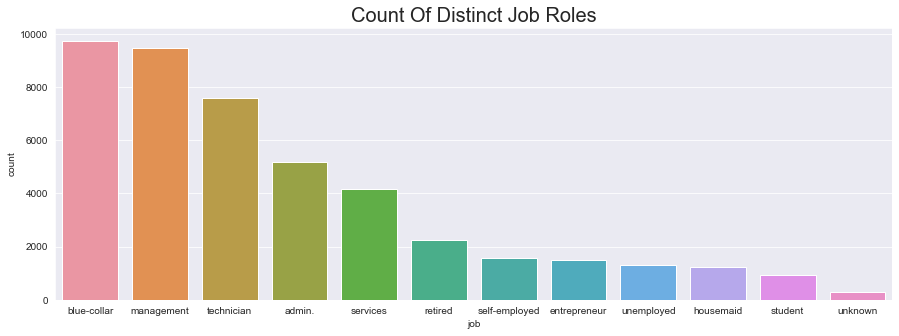

In [3]:
# Finding number of jobs and types
plt.figure(figsize = (15,5))
print(bank.job.value_counts())
sns.countplot(bank['job'], order = bank['job'].value_counts().index)
plt.title("Count Of Distinct Job Roles", fontsize = 20)

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Text(0.5, 1.0, 'Count of Marital Staus')

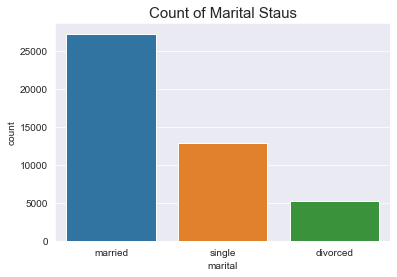

In [4]:
# Exploring marital status - # of people married, single or divorced
print(bank.marital.value_counts())
sns.countplot(bank.marital)
plt.title("Count of Marital Staus", fontsize = 15)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Text(0.5, 1.0, 'Education Level')

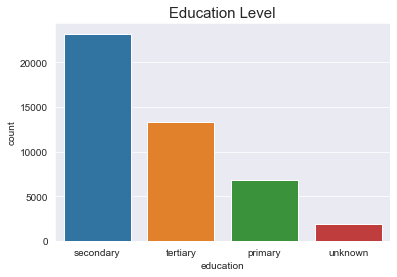

In [5]:
# Number of people with different education levels
print(bank.education.value_counts())
sns.countplot(bank.education, order = bank['education'].value_counts().index)
plt.title("Education Level", fontsize = 15)

More people holds secondary education

no     44396
yes      815
Name: default, dtype: int64


Text(0.5, 1.0, 'Have Credit in Default')

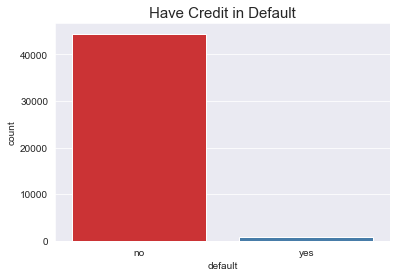

In [6]:
# Exploring number of people holding credit in default
print(bank['default'].value_counts())
sns.countplot(bank.default, palette = 'Set1')
plt.title ("Have Credit in Default", fontsize = 15)

Very less people (815) holds credit in default as compared to people who do not hold credit in default(44396). Here we can see very large class imbalance in this attribute. Therefore, we can consider removing it.

yes    25130
no     20081
Name: housing, dtype: int64


Text(0.5, 1.0, 'Count of people having Housing Loan')

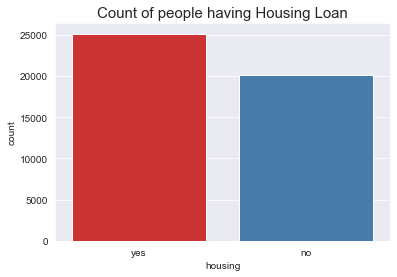

In [7]:
# No of people having housing loan or not
print(bank.housing.value_counts())
sns.countplot(bank.housing, palette = "Set1")
plt.title('Count of people having Housing Loan', fontsize = 15)

More people have housing loan

no     37967
yes     7244
Name: loan, dtype: int64


Text(0.5, 1.0, 'Count of people having Personal Loan')

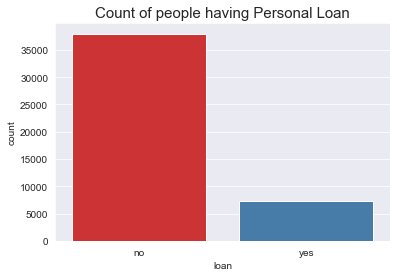

In [8]:
# Number of people having personal loan
print(bank.loan.value_counts())
sns.countplot(bank.loan, palette = "Set1")
plt.title("Count of people having Personal Loan", fontsize = 15)

Very less people have Personal Loan

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


Text(0.5, 1.0, 'Mode of Contact')

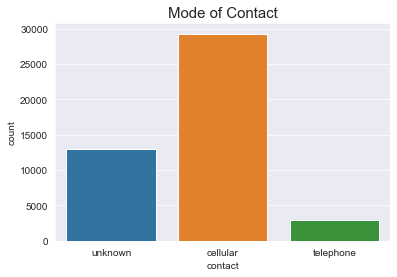

In [9]:
# type of communication mode: telephone or cellular
print(bank.contact.value_counts())
sns.countplot(bank.contact)
plt.title("Mode of Contact", fontsize = 15)

In [10]:
# checking for wrong value in day
print("minimum value in day column: {}".format(bank.day.min()))
print("maximum value in dat column: {}".format(bank.day.max()))

minimum value in day column: 1
maximum value in dat column: 31


No invalid value found in day column.

In [11]:
# checking for wrong value in month column
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

No improper entry found in the month column.

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


Text(0.5, 1.0, 'Outcome of Previous Marketing Campaign')

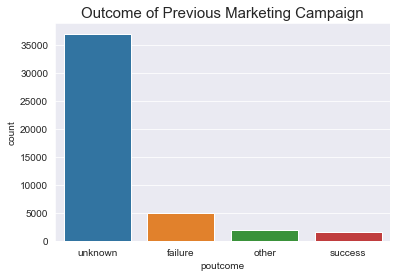

In [12]:
# Exploring outcome of previous marketing campaign
print(bank.poutcome.value_counts())
sns.countplot(bank.poutcome)
plt.title("Outcome of Previous Marketing Campaign", fontsize = 15)

In [13]:
# number of clients who were not previously contacted
print("No. of people who were not previously concated are: {}".format(len(bank[bank.pdays == 999])))
bank[bank.pdays==999]

No. of people who were not previously concated are: 0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


All the clients were at contacted at least once.

no     39922
yes     5289
Name: Target, dtype: int64


Text(0.5, 1.0, 'No of people Subscribed vs Not Subscribed term deposit')

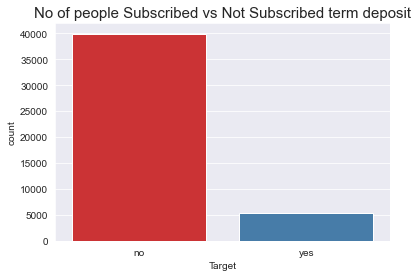

In [14]:
# No of people subscribed to term deposit
# Dependent variable 
print(bank.Target.value_counts())
sns.countplot(bank.Target, palette = 'Set1')
plt.title("No of people Subscribed vs Not Subscribed term deposit", fontsize = 15)

Less number of people subscrtibed for term deposit

#### Bivariate Analysis

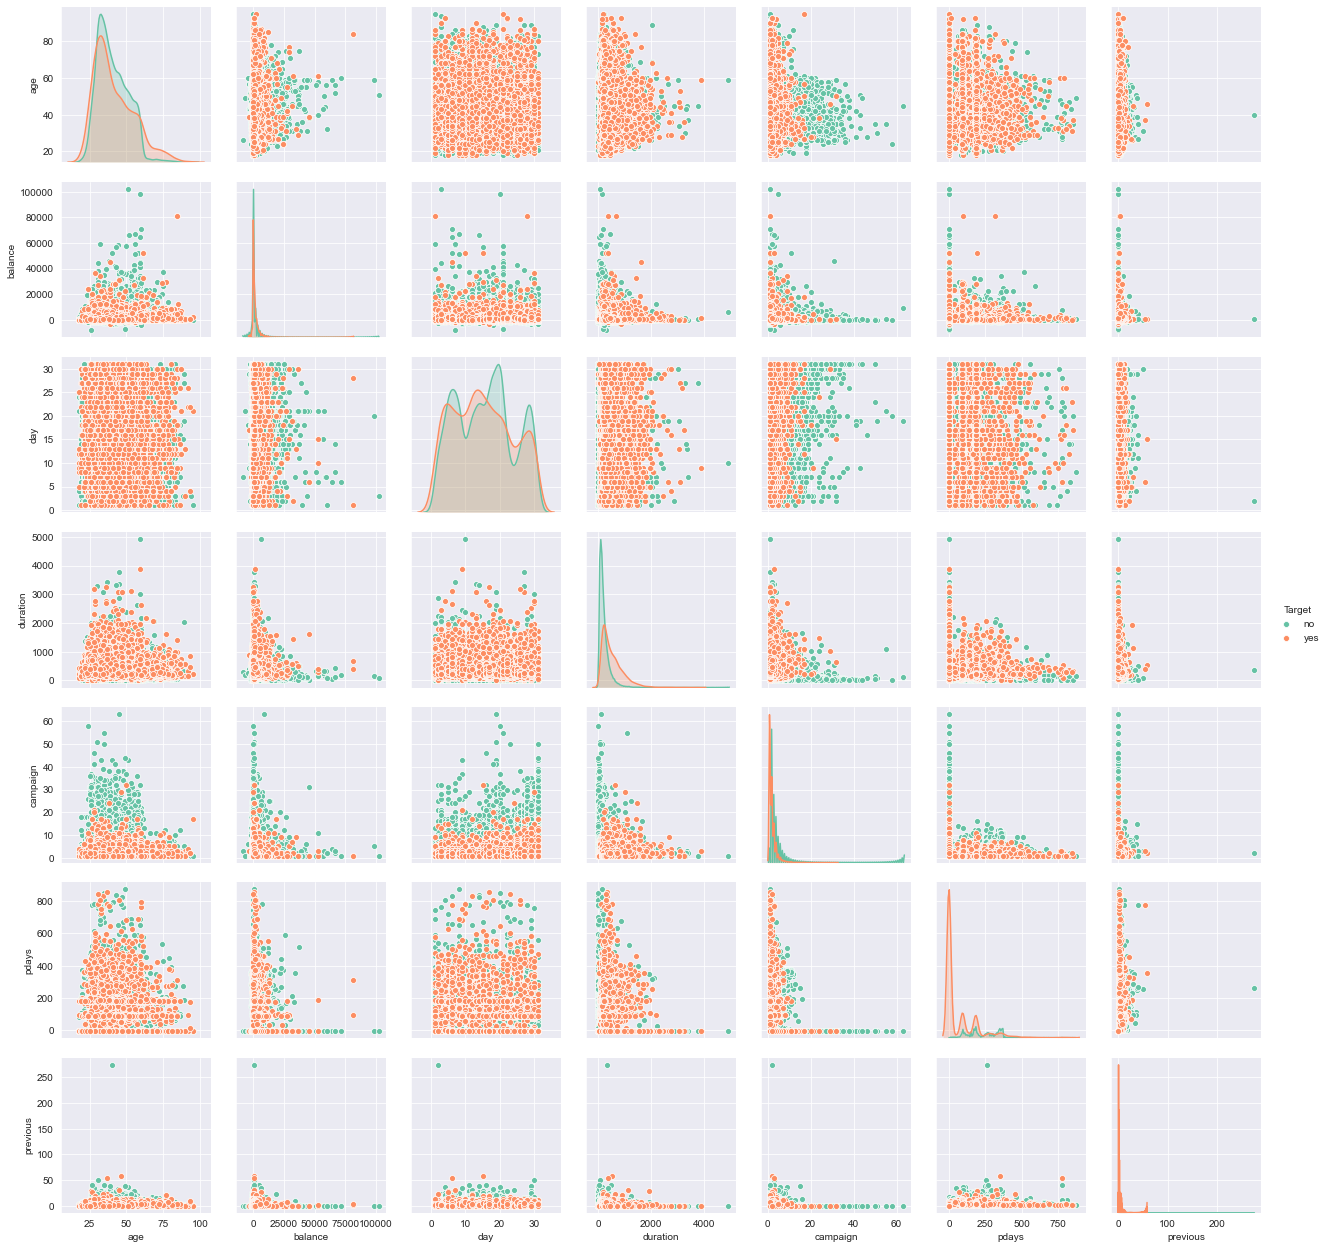

In [15]:
sns.pairplot(bank, hue = 'Target', palette = "Set2")

Text(0.5, 1.0, 'Age Distribution of clients who did not subscribed')

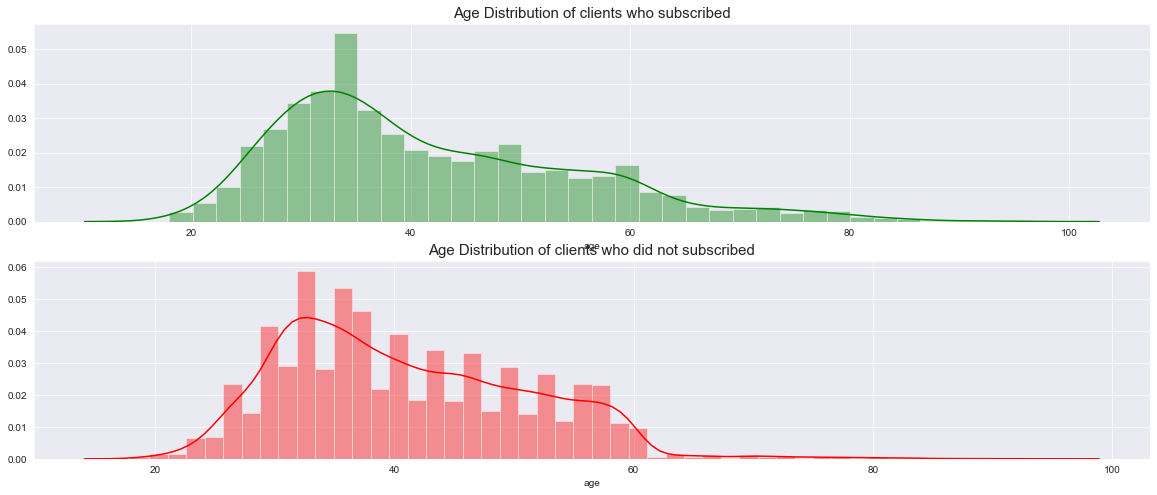

In [16]:
# sns.distplot('age', data = bank[bank['Target'] == 'no'])
plt.figure(figsize = (20,8))
plt.subplot(2,1,1)
sns.distplot(bank[bank['Target']=='yes']['age'], color = 'green', label = None )
plt.title("Age Distribution of clients who subscribed", fontsize = 15)
plt.subplot(2,1,2)
sns.distplot(bank[bank['Target']=='no']['age'], color = "red")
plt.title("Age Distribution of clients who did not subscribed", fontsize = 15)

Almost all age of people either subscribe or don't subscribe. However, the above comparison shows that people after age 60 mostly favour to subscribe to term deposit.

In [17]:
bank.groupby('Target').mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [18]:
# Contingency Tables
pd.crosstab(bank.job, bank.Target,  normalize='index').sort_values(by = 'yes', ascending = False)

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862444,0.137556
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889430,0.110570
services,0.911170,0.088830


It can be observed that students are the higest among who subscribed for credit (28%) and blue-collar job people are the lowest (7%)

In [19]:
pd.crosstab(bank.marital, bank.Target, normalize = 'index').sort_values(by = 'yes', ascending = False)

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898765,0.101235


It can be observed that single people are higest among who subscribe for credit (14%) and married were the least (10%)

In [20]:
pd.crosstab(bank.education, bank.Target, normalize = 'index').sort_values(by = 'yes', ascending = False)

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894406,0.105594
primary,0.913735,0.086265


It can be observed that people with higher education were the highest among the people who subscribe (15%) and people with primary education were the least (8%)

In [21]:
pd.crosstab(bank.housing, bank.Target, normalize = 'index').sort_values(by = 'yes', ascending = False)

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


More people without housing loan subscribed for credit (16%) as compared to people with personal loan(7%)

In [22]:
pd.crosstab(bank.loan, bank.Target, normalize = 'index').sort_values(by = 'yes', ascending = False)

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


More people without personal loan (12%) subscribe for credit as compared to people with personal loan(6%) 

This infers that people who have a loan (either housing or personal) are reluctant to subscribe for credit

In [23]:
pd.crosstab(bank.contact, bank.Target, normalize = 'index').sort_values(by = 'yes', ascending = False)

Target,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


Mode of communication doesn't play any significant role in people subscribing. Both modes cellular and telephone have equal subscribing rates

### 4. Prepare the data to train a model

In [24]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [25]:
# No null values are found
# job, marital, education, default, housing, loan, contact, month, poutcome, Target are object type. 
# converting them to categorical

In [26]:
# converting object type data to categorical
for features in bank.columns:
    if bank[features].dtype == 'object':
        bank[features] = pd.Categorical(bank[features])

In [27]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [28]:
# data types converted.

In [29]:
# Higher class imbalance in default as seen in univariate analysis.
print(bank.default.value_counts(normalize = True))

no     0.981973
yes    0.018027
Name: default, dtype: float64


In [30]:
# Removing default since class yes is almost only 2%
bank.drop('default', axis = 1,inplace = True)

In [31]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')

In [32]:
# Printing value_counts of categorical attributes
print("---job---")
print(bank.job.value_counts())
print()
print("---marital---")
print(bank.marital.value_counts())
print()
print("---education---")
print(bank.education.value_counts())
print()
print("---housing---")
print(bank.housing.value_counts())
print()
print("---loan---")
print(bank.loan.value_counts())
print()
print("---contact---")
print(bank.contact.value_counts())
print()
print("---month---")
print(bank.month.value_counts())
print()
print("---poutcome---")
print(bank.poutcome.value_counts())
print()

---job---
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

---marital---
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

---education---
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

---housing---
yes    25130
no     20081
Name: housing, dtype: int64

---loan---
no     37967
yes     7244
Name: loan, dtype: int64

---contact---
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

---month---
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

---poutcome---
unknown    36959
failure     4901
other

In [33]:
# converting data to numerical
# No general order found in values of job columns. Will consider it to convert into dummy variable
# marital will be converted into dummy variable 
# education is ordinal - primary :1, secondary :2, tertiary :3, unknown :-1
# housing is binary - 0:no, 1:yes
# loan is binary - 0:no, 1:yes
# contact can be categorized into - cellular:0, telephone:1, unknown:-1
# month is in general order - 1:jan, 2:feb, 3:mar, ... , 12:dec
# poutcome - will be converted to dummy variable

In [34]:
# Constructing a Structure to convert education, housing, loan, contact, month, Target into numerical 
replaceStruct = {
    'education':{'primary':1, 'secondary':2, 'tertiary':3, 'unknown':-1},
    'housing':{'no':0, 'yes':1},
    'loan':{'no':0, 'yes':1},
    'contact':{'cellular':0, 'telephone':1, 'unknown':-1},
    'month':{'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12},
    'Target':{'no':0, 'yes':1}
}

In [35]:
# list to make dummy variables of job, marital and poutcome columns
oneHotCols = ['job','marital','poutcome']

In [36]:
bank = bank.replace(replaceStruct)

In [37]:
bank = pd.get_dummies(bank, columns = oneHotCols)

In [38]:
bank.columns

Index(['age', 'education', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [39]:
# we can remove one dummy variable from job,marital and poutcome's dummy variables each, to avoid dummy trap
# removing job_unknown, marital_divorced, poutcome_unknown

In [40]:
bank.drop(columns={'job_unknown', 'marital_divorced', 'poutcome_unknown'}, inplace = True)

In [41]:
bank.columns

Index(['age', 'education', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [42]:
# Finding the correlation matrix
corr = round(bank.corr(),2)

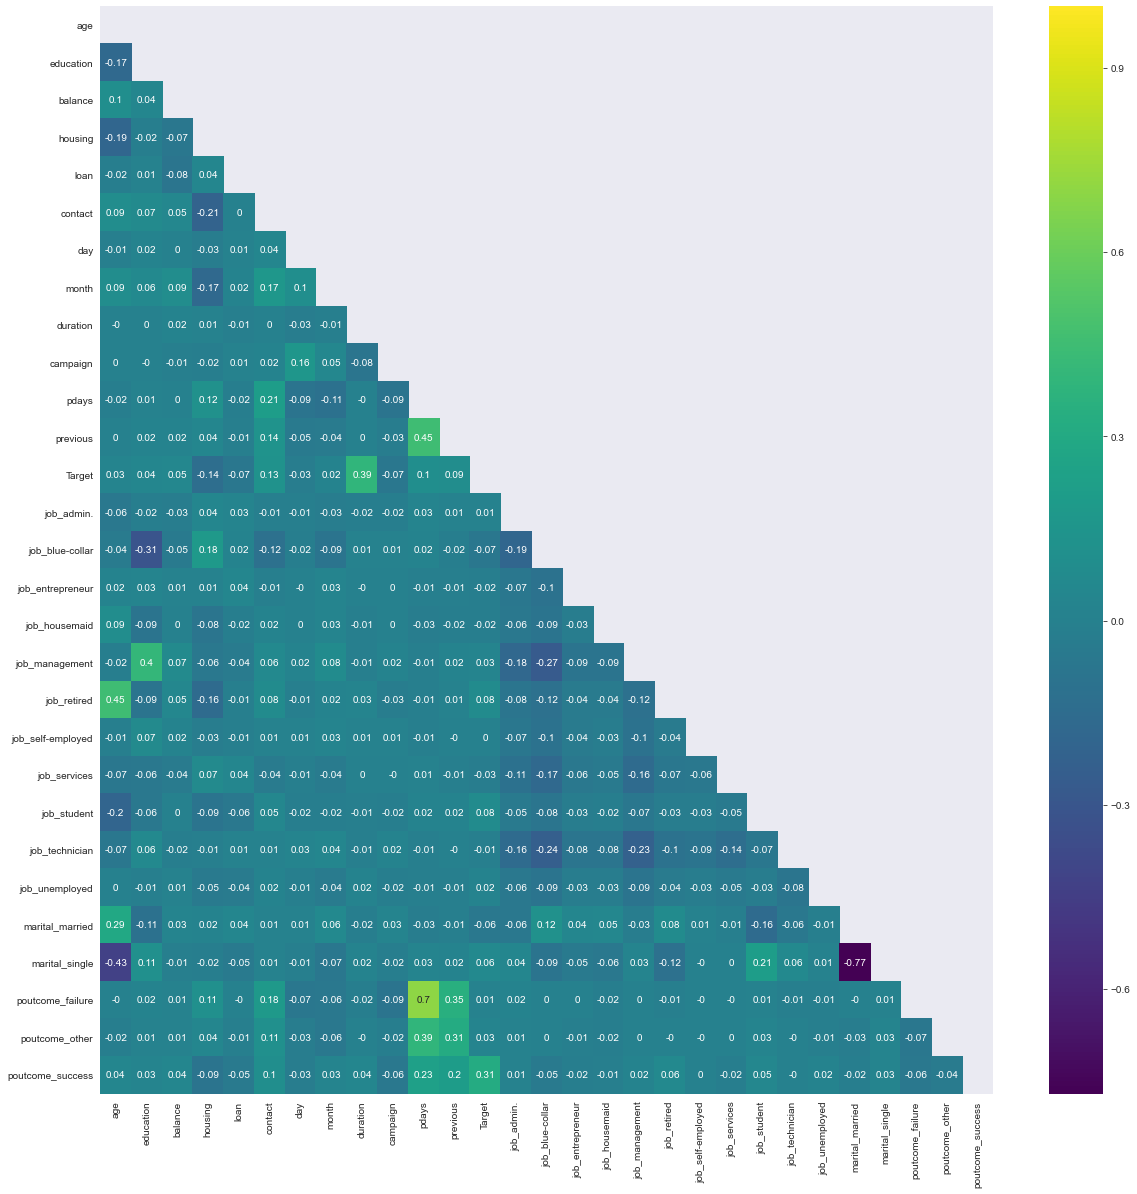

In [43]:
# Plotting the correlation matrix
plt.figure(figsize = (20,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, fmt = 'g', mask = mask, cmap =plt.cm.viridis )

In [44]:
# percent of people subscribe to term deposit
print("Percent of people subscribed to term deposit: {0:.2f}%".format((len(bank[bank['Target'] == 'yes']) / bank.shape[0]) * 100 ))
print("Percent of people did not subscribed to term deposit: {0:.2f}%".format((len(bank[bank['Target'] == 'no']) / bank.shape[0]) * 100 ))

Percent of people subscribed to term deposit: 0.00%
Percent of people did not subscribed to term deposit: 0.00%


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


###### ML algorithm assumes that dataset have balance class distribution. However, here in this dataset, Dependent Variable exhibits higher class imbalance (11.7 : 88.3). In situation like this it tends the algorithm to cause the performance of existing classifiers to get biased towards majority class. Therefore accuracy is not a suitable or reliable measure in this case. We will look for  Precision and Recall here.

In [45]:
# X - set of all independent variable
# y - dependent variable 
X = bank.drop("Target", axis = 1)
y = bank['Target']

In [46]:
X.shape, y.shape

((45211, 28), (45211,))

In [47]:
# fixing the seed value to 1
seed = 1

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 28)
(13564, 28)
(31647,)
(13564,)


In [50]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5. Train a few standard classification algorithm

#### Fitting the model (Logistic Regression)

In [51]:
logreg = LogisticRegression(solver = 'liblinear', random_state = seed)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred_logreg = logreg.predict(X_test)

In [53]:
print("accuracy of the model knn is : {0:.2f}%".format(accuracy_score(y_test,y_pred_logreg) * 100))

accuracy of the model knn is : 90.03%


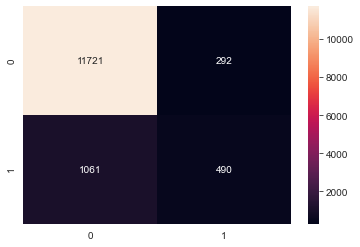

In [54]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot = True, fmt = 'g')

In [55]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.63      0.32      0.42      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.89     13564



#### Fitting the model (KNN)

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
y_pred_knn = knn.predict(X_test)

In [58]:
print("accuracy of the model knn is : {0:.2f}%".format(accuracy_score(y_test,y_pred_knn) * 100))

accuracy of the model knn is : 89.18%


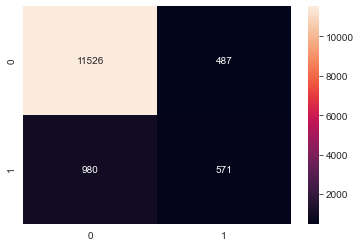

In [59]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot = True, fmt = 'g')

In [60]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12013
           1       0.54      0.37      0.44      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.66      0.69     13564
weighted avg       0.88      0.89      0.88     13564



#### Fitting model (Naive-Bayes)

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
y_pred_nb = nb.predict(X_test)

In [63]:
print("accuracy of the model naive-bayes is : {0:.2f}%".format(accuracy_score(y_test,y_pred_nb) * 100))

accuracy of the model naive-bayes is : 83.64%


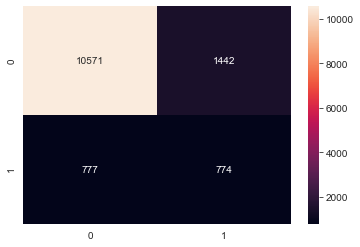

In [64]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot = True, fmt = 'g')

In [65]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     12013
           1       0.35      0.50      0.41      1551

    accuracy                           0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.86      0.84      0.85     13564



#### Fitting model (SVM)

In [66]:
kernel_svm = SVC(kernel='rbf', random_state = seed)
kernel_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
y_pred_svm = kernel_svm.predict(X_test)

In [68]:
print("accuracy of the model knn is : {0:.2f}%".format(accuracy_score(y_test,y_pred_svm) * 100))

accuracy of the model knn is : 90.17%


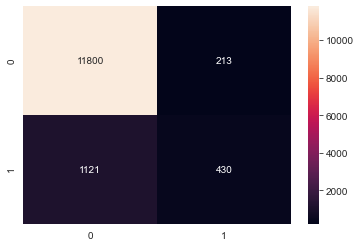

In [69]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot = True, fmt = 'g')

In [70]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12013
           1       0.67      0.28      0.39      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.67     13564
weighted avg       0.89      0.90      0.88     13564



In [71]:
print('Logistic Regression')
print(cm_logreg)
print('Knn')
print(cm_knn)
print('naive bayes')
print(cm_nb)
print('SVM')
print(cm_svm)

Logistic Regression
[[11721   292]
 [ 1061   490]]
Knn
[[11526   487]
 [  980   571]]
naive bayes
[[10571  1442]
 [  777   774]]
SVM
[[11800   213]
 [ 1121   430]]


#### Making Decision Tree

In [72]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = seed)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [73]:
y_pred_dt = dt.predict(X_test)

In [74]:
print('score on training data')
print(dt.score(X_train, y_train))

score on training data
1.0


In [75]:
print('score on testing data')
print(dt.score(X_test, y_test))

score on testing data
0.8713506340312592


In [76]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12013
           1       0.44      0.49      0.46      1551

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.88      0.87      0.87     13564



###### Making Pruned Decision Tree

In [77]:
dt_pruned = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf=5, random_state = seed)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [78]:
y_pred_dt_pruned = dt_pruned.predict(X_test)

In [79]:
print("printing score on training data")
print(dt_pruned.score(X_train,y_train))

printing score on training data
0.9007804847220906


In [80]:
print("printing score on testing data")
print(dt_pruned.score(X_test, y_test))

printing score on testing data
0.9023149513417871


accuracy on training and testing data set is almost similar indicating that decision tree is rightly pruned.

In [81]:
print(classification_report(y_test, y_pred_dt_pruned))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.64      0.33      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



Pruning the tree removed overfitting however the Recall is gone down from 0.49 to 0.33

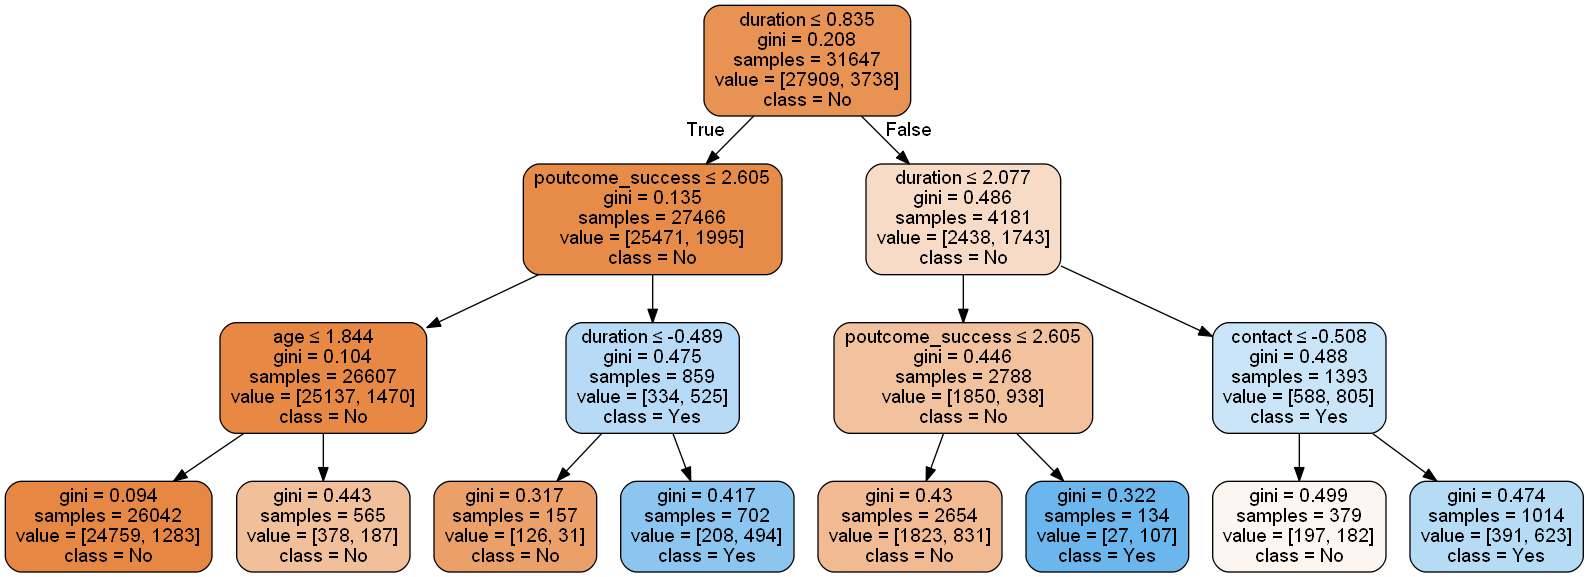

In [82]:
# Plotting the tree
# visualizing the tree after regularization
train_char_label = ['No', 'Yes']
pruned_Tree_File = open('pruned_tree.dot','w')
dot_data = tree.export_graphviz(dt_pruned, out_file=pruned_Tree_File, filled=True, rounded=True,impurity=True,
                special_characters=True , feature_names = list(X), class_names = list(train_char_label))
pruned_Tree_File.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng pruned_tree.dot -o pruned_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("pruned_tree.png"))



In [83]:
# Calculating feature importance
print (pd.DataFrame(dt_pruned.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by='Imp', ascending = False))

                        Imp
duration           0.606064
poutcome_success   0.336673
age                0.051440
contact            0.005823
housing            0.000000
job_management     0.000000
poutcome_other     0.000000
poutcome_failure   0.000000
marital_single     0.000000
marital_married    0.000000
job_unemployed     0.000000
job_technician     0.000000
job_student        0.000000
job_services       0.000000
job_self-employed  0.000000
job_retired        0.000000
job_housemaid      0.000000
loan               0.000000
education          0.000000
job_blue-collar    0.000000
job_admin.         0.000000
previous           0.000000
pdays              0.000000
campaign           0.000000
balance            0.000000
month              0.000000
day                0.000000
job_entrepreneur   0.000000


### 6. Build the ensemble models

#### Building Random Forest

In [84]:
rndmfrst = RandomForestClassifier(n_estimators = 50)
rndmfrst.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_pred_rndmfrst = rndmfrst.predict(X_test)

In [86]:
print("Accuarcy of Random Forest is: {0:.2f}".format(accuracy_score(y_test, y_pred_rndmfrst)))

Accuarcy of Random Forest is: 0.91


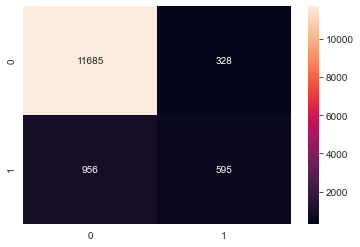

In [87]:
cm_rndmfrst = confusion_matrix(y_test, y_pred_rndmfrst)
sns.heatmap(cm_rndmfrst, annot = True, fmt = 'g')

In [88]:
print(classification_report(y_test, y_pred_rndmfrst))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.64      0.38      0.48      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [89]:
# Recall is 0.39 which is lesser than recall of decision tree(0.49)

#### Applying adaboost on the same data

In [90]:
adaboost = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1, random_state = seed)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=1)

In [91]:
y_pred_adaboost = adaboost.predict(X_test)

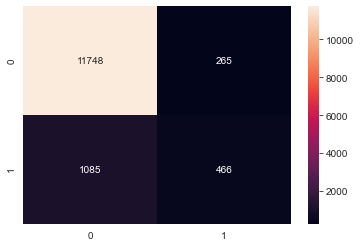

In [92]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm_adaboost, annot = True, fmt = 'g')

In [93]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.64      0.30      0.41      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [94]:
# Recall decreased after applying adaboosting method

#### Applying Bagging Classifier

In [95]:
bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state = seed)
bgcl.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=100,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)

In [96]:
y_pred_bgcl = bgcl.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred_bgcl))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.62      0.49      0.54      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



In [98]:
# Recall is 0.49 (same as that of decision tree)

### 7. Compare performances of all the models

In [99]:
print("Recall for Logistic Regression : {0:.2}".format(recall_score(y_test, y_pred_logreg, average="binary")))
print("Recall for KNN is : {0:.2}".format(recall_score(y_test, y_pred_knn, average="binary")))
print("Recall for Naive Bayes is : {0:.2}".format(recall_score(y_test, y_pred_knn, average="binary")) )
print("Recall for SVM is : {0:.2}".format(recall_score(y_test, y_pred_svm, average="binary")))

Recall for Logistic Regression : 0.32
Recall for KNN is : 0.37
Recall for Naive Bayes is : 0.37
Recall for SVM is : 0.28


In [100]:
print("Recall for Random Forest is : {0:.2}".format(recall_score(y_test, y_pred_rndmfrst, average = "binary")))
print("Recall for AdaBoosting is : {0:.2}".format(recall_score(y_test, y_pred_adaboost)))
print("Recall for Bagging Classifier is {0:.2}".format(recall_score(y_test, y_pred_bgcl)))

Recall for Random Forest is : 0.38
Recall for AdaBoosting is : 0.3
Recall for Bagging Classifier is 0.49


In [101]:
from sklearn.metrics import precision_score
print("Recall for Random Forest is : {0:.2}".format(precision_score(y_test, y_pred_rndmfrst, average = "binary")))
print("Recall for AdaBoosting is : {0:.2}".format(precision_score(y_test, y_pred_adaboost)))
print("Recall for Bagging Classifier is {0:.2}".format(precision_score(y_test, y_pred_bgcl)))

Recall for Random Forest is : 0.64
Recall for AdaBoosting is : 0.64
Recall for Bagging Classifier is 0.62
